In [28]:
from pandas import read_csv

In [29]:
from google.colab import files
uploaded=files.upload()

Saving Energy Meter.csv to Energy Meter (1).csv


In [30]:
filename=('Energy Meter.csv')
name=['Voltage','Current','Power','Class']
ds=read_csv(filename,names=name)

In [31]:
from sklearn.model_selection import train_test_split
array=ds.values
x=array[:,0:3]
y=array[:,3]
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.20,random_state=1,shuffle=True)

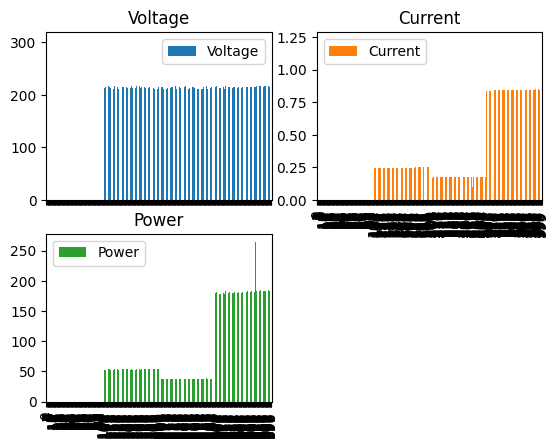

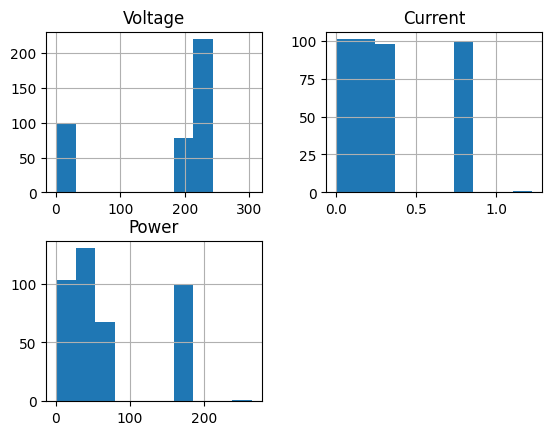

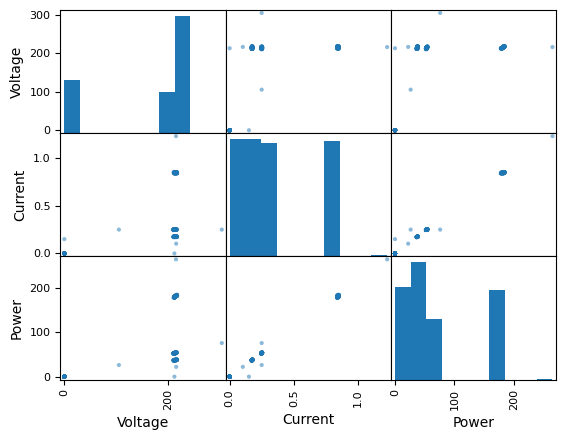

In [32]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
ds.plot(kind='bar',subplots=True,layout=(2,2))
pyplot.title('Bar Plot')
pyplot.show()

ds.hist()
pyplot.title('Histogram Plot')
pyplot.show()

scatter_matrix(ds)
pyplot.show()


In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [46]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNC',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC(kernel='rbf')))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR:0.996875 (0.009375)
LDA:0.996875 (0.009375)
DTC:0.996875 (0.009375)
KNC:0.993750 (0.018750)
NB:0.990625 (0.020010)
SVC:0.993750 (0.018750)


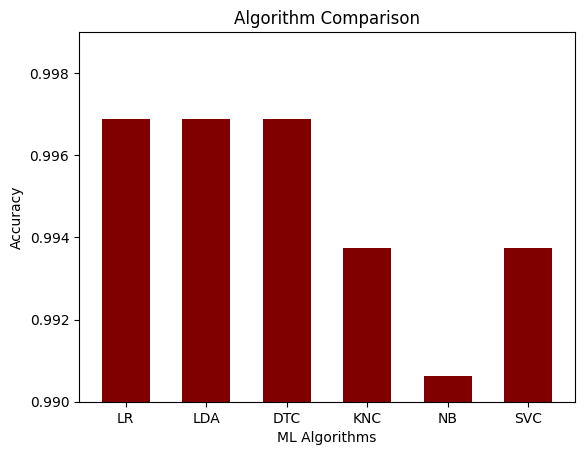

In [47]:
from sys import set_coroutine_origin_tracking_depth
results=[]
names=[]
res=[]
for name,model in models:
  KFold=StratifiedKFold(n_splits=10,random_state=None)
  cv_results=cross_val_score(model,x_train,y_train,cv=KFold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s:%f (%f)'%(name,cv_results.mean(),cv_results.std()))
pyplot.ylim(0.990,0.999)
pyplot.bar(names,res,color='maroon',width=0.6)
pyplot.title('Algorithm Comparison')
pyplot.xlabel('ML Algorithms')
pyplot.ylabel('Accuracy')
pyplot.show()